In [1]:
import pandas as pd
import numpy as np

import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df_sample = pd.read_csv('dataset/Sample Prediction Dataset.csv')
df_test = pd.read_csv('dataset/Test Data.csv')
df = pd.read_csv('dataset/Training Data.csv')

In [3]:
# Display the first 5 rows
df_sample.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [4]:
# Display the first 5 rows
df_test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
# Display the first 5 rows
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


## There is No Null Data

In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
df.select_dtypes('object').describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [9]:
def load(read, info=True):
    import io

    if info:
        if len(read) > 0:
            print('Data Imported')
            print('Dimesion Table -----------','\n')
            print('Row:',read.shape[0],'\n''Column:',read.shape[1])

            print('DTypes------------------------------------------')
            if len(read.select_dtypes('object').columns)>0:
                print('Count Data Object:',len(read.select_dtypes('object').columns),'\n''Column List:',
                      read.select_dtypes("object").columns.tolist(),'\n')
            else:
                print('No Data Object')

            if len(read.select_dtypes('integer').columns)>0:
                print('Count Data integer:',len(read.select_dtypes('integer').columns),'\n''Column List:',
                      read.select_dtypes("integer").columns.tolist(), '\n')
            else:
                print('No Data Integer')

            if len(read.select_dtypes('float').columns)>0:
                print('Count Data float:',len(read.select_dtypes('float').columns),'\n''Column List:',
                      read.select_dtypes("float").columns.tolist(), '\n')
            else:
                print('No Data float')

            if len(read.select_dtypes('bool').columns)>0:
                print('Count Data bool:',len(read.select_dtypes('bool').columns),'\n''Column List:',
                      read.select_dtypes("bool").columns.tolist(), '\n')
            else:
                print('No Data boolean')

load(df)

Data Imported
Dimesion Table ----------- 

Row: 252000 
Column: 13
DTypes------------------------------------------
Count Data Object: 6 
Column List: ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'] 

Count Data integer: 7 
Column List: ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'] 

No Data float
No Data boolean


In [10]:
# Check for Inconsistent Entries
# Example: Check for unique values in categorical columns
categorical_cols = ["Married/Single", "House_Ownership", "Car_Ownership", "CITY", "STATE", "Profession"]
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-----------------------------")

Unique values in Married/Single:
['single' 'married']
-----------------------------
Unique values in House_Ownership:
['rented' 'norent_noown' 'owned']
-----------------------------
Unique values in Car_Ownership:
['no' 'yes']
-----------------------------
Unique values in CITY:
['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Ha

In [11]:
# Cleaning CITY column (removing unwanted characters like [10], [6], etc.)
df["CITY"] = df["CITY"].str.replace(r"\[\d+\]", "", regex=True).str.strip()
df_test["CITY"] = df_test["CITY"].str.replace(r"\[\d+\]", "", regex=True).str.strip()

# Cleaning STATE column (removing unwanted characters like [5], etc.)
df["STATE"] = df["STATE"].str.replace(r"\[\d+\]", "", regex=True).str.strip()
df_test["STATE"] = df_test["STATE"].str.replace(r"\[\d+\]", "", regex=True).str.strip()

# Convert all object (string) columns to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
df_test = df_test.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [12]:
categorical_cols = ["Married/Single", "House_Ownership", "Car_Ownership", "CITY", "STATE", "Profession"]
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-----------------------------")

Unique values in Married/Single:
['single' 'married']
-----------------------------
Unique values in House_Ownership:
['rented' 'norent_noown' 'owned']
-----------------------------
Unique values in Car_Ownership:
['no' 'yes']
-----------------------------
Unique values in CITY:
['rewa' 'parbhani' 'alappuzha' 'bhubaneswar' 'tiruchirappalli' 'jalgaon'
 'tiruppur' 'jamnagar' 'kota' 'karimnagar' 'hajipur' 'adoni' 'erode'
 'kollam' 'madurai' 'anantapuram' 'kamarhati' 'bhusawal' 'sirsa'
 'amaravati' 'secunderabad' 'ahmedabad' 'ajmer' 'ongole' 'miryalaguda'
 'ambattur' 'indore' 'pondicherry' 'shimoga' 'chennai' 'gulbarga'
 'khammam' 'saharanpur' 'gopalpur' 'amravati' 'udupi' 'howrah'
 'aurangabad' 'hospet' 'shimla' 'khandwa' 'bidhannagar' 'bellary'
 'danapur' 'purnia' 'bijapur' 'patiala' 'malda' 'sagar' 'durgapur'
 'junagadh' 'singrauli' 'agartala' 'thanjavur' 'hindupur' 'naihati'
 'north_dumdum' 'panchkula' 'anantapur' 'serampore' 'bathinda' 'nadiad'
 'kanpur' 'haridwar' 'berhampur' 'jamshe

## Drop the ID

In [13]:
df_train = df.drop('Id', axis=1) if len(df['Id']) == len(df) else df
df_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0
2,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0
3,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1
4,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1


In [14]:
df_tes = df_test.drop('ID', axis=1) if len(df_test['ID']) == len(df_test) else df_test
df_tes.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,geologist,malda,west bengal,4,13
1,1215004,25,5,single,rented,no,firefighter,jalna,maharashtra,5,10
2,8901342,50,12,single,rented,no,lawyer,thane,maharashtra,9,14
3,1944421,49,9,married,rented,yes,analyst,latur,maharashtra,3,12
4,13429,25,18,single,rented,yes,comedian,berhampore,west bengal,13,11


In [15]:
def columns_less_than_10_unique(df):
    columns_less_than_10_unique = [col for col in df.columns if df[col].nunique() < 10]
    df_less10 = df[columns_less_than_10_unique].copy()
    df_less10_with_y = df_less10.copy()
    df_less10 = df_less10.drop(df_less10.columns[-1], axis=1)
    return df_less10, df_less10_with_y

t, t_with_y = columns_less_than_10_unique(df)

t.head()

,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS
0,single,rented,no,13
1,single,rented,no,13
2,married,rented,no,10
3,single,rented,yes,12
4,single,rented,no,14


<h1>Visualize</h1>

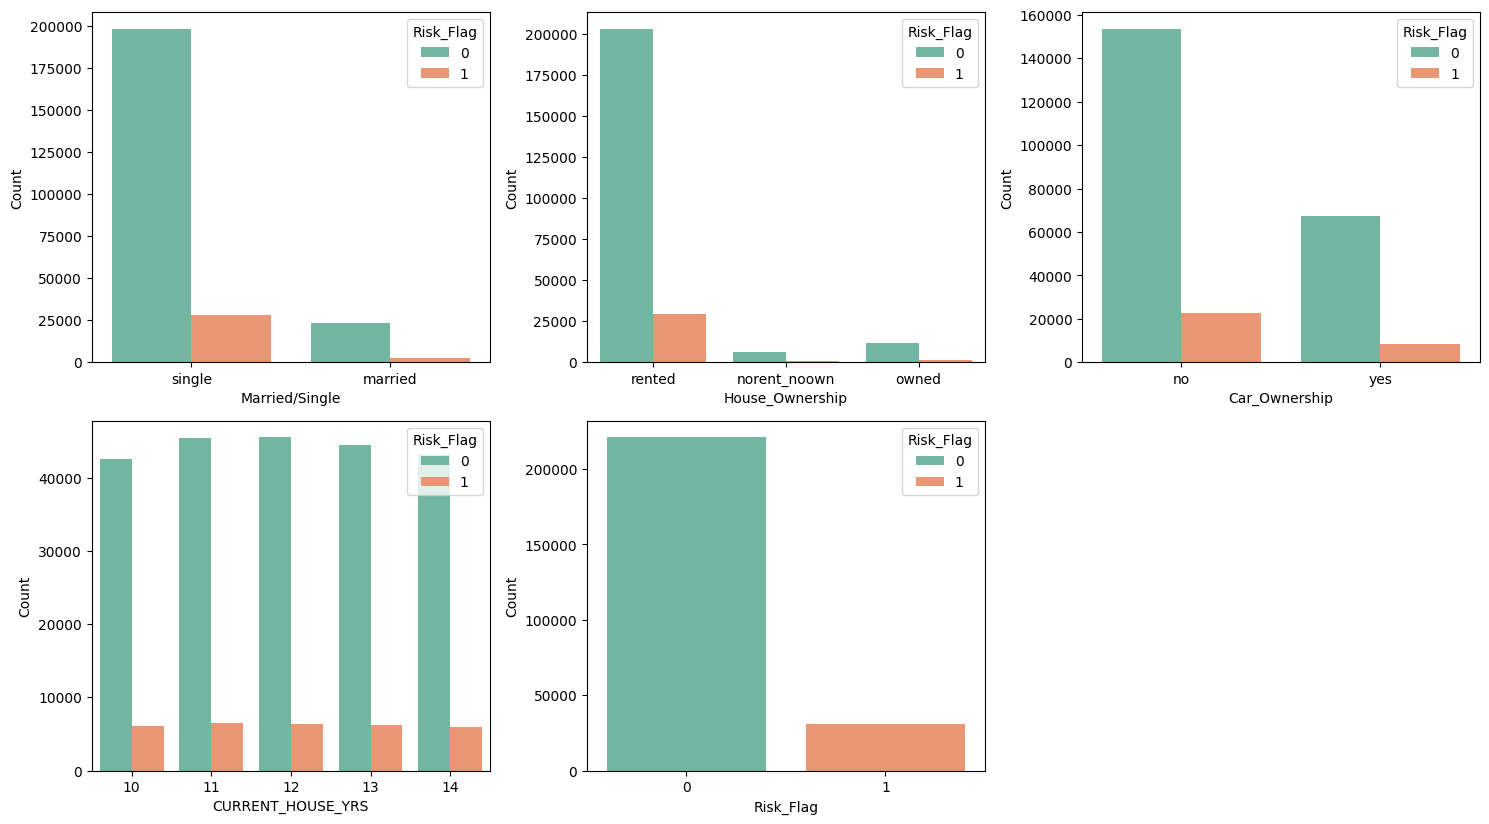

In [16]:
def plot_subplots_cat(df, divider_col):
    num_plots = len(df.columns)
    num_rows = (num_plots + 1) // 2

    fig = plt.figure(figsize=(15, 12))

    for i, column in enumerate(df.columns, start=1):
        ax = fig.add_subplot(num_rows, 3, i)
        sns.countplot(x=column, palette='Set2', hue=divider_col, data=df, ax=ax)
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_subplots_cat(t_with_y, t_with_y.columns[-1])

### 1. Married Status vs. Risk Flag
Mayoritas peminjam yang mengajukan kredit adalah single, dengan jumlah yang jauh lebih besar dibandingkan yang menikah. Namun, proporsi peminjam berisiko (Risk_Flag = 1) terlihat lebih tinggi pada kelompok single dibandingkan yang menikah, yang bisa mengindikasikan bahwa status pernikahan berpengaruh pada stabilitas keuangan seseorang.

### 2. House Ownership vs. Risk Flag
Sebagian besar peminjam tinggal di rumah sewa, dan mereka juga memiliki jumlah peminjam berisiko yang lebih tinggi dibandingkan dengan mereka yang memiliki rumah sendiri. Hal ini dapat menunjukkan bahwa memiliki rumah sendiri berpotensi menurunkan risiko kredit macet, karena kepemilikan aset bisa menjadi indikator kestabilan keuangan.

### 3. Car Ownership vs. Risk Flag
Peminjam yang tidak memiliki mobil jauh lebih banyak dibandingkan mereka yang memiliki mobil. Namun, dalam kedua kelompok, persentase peminjam berisiko tampak relatif serupa. Ini mengindikasikan bahwa kepemilikan mobil bukan faktor utama dalam menentukan risiko kredit, meskipun bisa menjadi salah satu pertimbangan dalam penilaian kredit.

### 4. Current House Years vs. Risk Flag
Rentang lama tinggal di rumah saat ini (10-14 tahun) tampaknya tidak memiliki variasi yang signifikan terhadap jumlah peminjam berisiko. Hal ini menunjukkan bahwa lamanya menetap di satu lokasi tidak secara langsung berkorelasi dengan tingkat risiko peminjam.

### 5. Risk Flag Distribution
Sebagian besar peminjam dalam dataset memiliki Risk_Flag = 0, artinya mereka tergolong dalam kelompok yang lebih aman untuk diberikan kredit. Namun, proporsi peminjam berisiko masih cukup besar, yang menunjukkan bahwa tetap diperlukan mekanisme penyaringan kredit yang kuat untuk mengurangi risiko gagal bayar.

## OUTLIERS

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [18]:
# Detecting Outliers using IQR
numeric_cols = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"]
for col in numeric_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Income: 0
Outliers in Age: 0
Outliers in Experience: 0
Outliers in CURRENT_JOB_YRS: 0
Outliers in CURRENT_HOUSE_YRS: 0


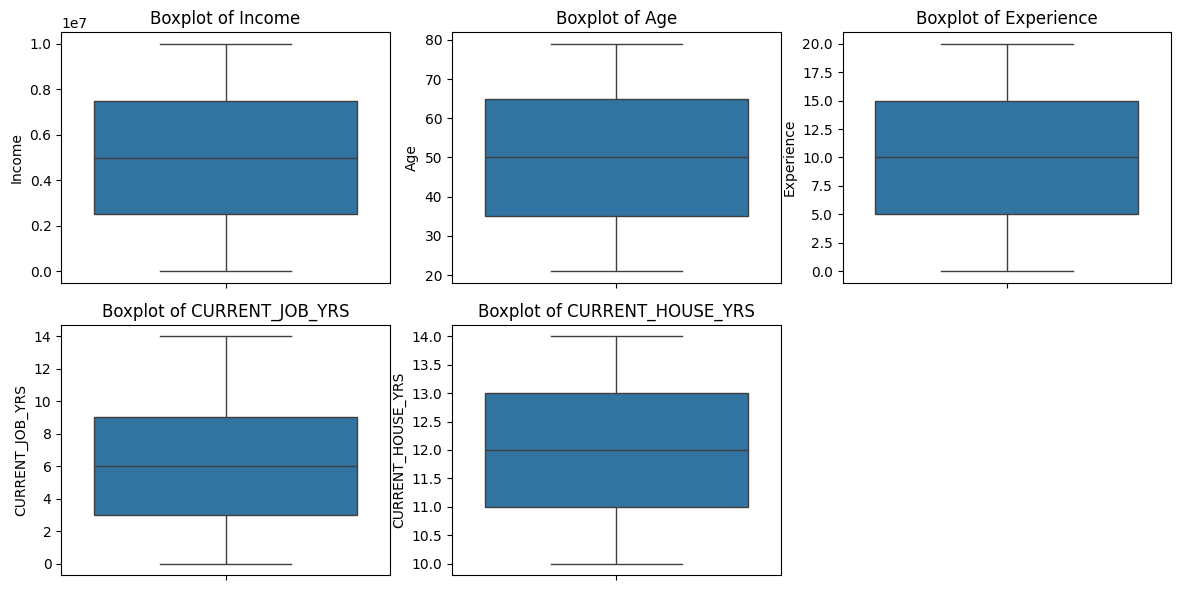

In [19]:
# Visualizing Outliers using Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [20]:
# Summary Statistics
descriptive_stats = df_train.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
             Income            Age     Experience  CURRENT_JOB_YRS  \
count  2.520000e+05  252000.000000  252000.000000    252000.000000   
mean   4.997117e+06      49.954071      10.084437         6.333877   
std    2.878311e+06      17.063855       6.002590         3.647053   
min    1.031000e+04      21.000000       0.000000         0.000000   
25%    2.503015e+06      35.000000       5.000000         3.000000   
50%    5.000694e+06      50.000000      10.000000         6.000000   
75%    7.477502e+06      65.000000      15.000000         9.000000   
max    9.999938e+06      79.000000      20.000000        14.000000   

       CURRENT_HOUSE_YRS      Risk_Flag  
count      252000.000000  252000.000000  
mean           11.997794       0.123000  
std             1.399037       0.328438  
min            10.000000       0.000000  
25%            11.000000       0.000000  
50%            12.000000       0.000000  
75%            13.000000       0.000000  
max      

## Feature Engineering

In [21]:
## 1. Age_Group
def categorize_age(age):
    if age < 18:
        return "young"
    elif age < 40:
        return "middle age"
    else:
        return "old"
df_train['age_group'] = df_train['Age'].apply(categorize_age)

# 2. Job Stability
df_train['job_stability'] = df_train['CURRENT_JOB_YRS'] / df_train['Age']

# 3. Home Stability
df_train['home_stability'] = df_train['CURRENT_HOUSE_YRS'] / df_train['Age']

# 4. Financial Stability Score (arbitrary formula)
df_train['financial_stability'] = df_train['Income'] * (df_train['Car_Ownership'].map({'yes': 1, 'no': 0}) + 1) * (df_train['House_Ownership'].map({'owned': 1, 'rented': 0.5, 'norent_noown': 0}))

# 5. Income
q1=df['Income'].quantile(0.25)
q3= df['Income'].quantile(0.75)
def income_segment(income):

    if income < q1:
        return "low"
    elif income > q3:
        return "high"
    else:
        return "medium"
df_train["income_segment"] = df_train["Income"].apply(income_segment)
df_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,age_group,job_stability,home_stability,financial_stability,income_segment
0,1303834,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0,middle age,0.130435,0.565217,651917.0,low
1,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0,old,0.225000,0.325000,3787258.0,high
2,3991815,66,4,married,rented,no,technical_writer,alappuzha,kerala,4,10,0,old,0.060606,0.151515,1995907.5,medium
3,6256451,41,2,single,rented,yes,software_developer,bhubaneswar,odisha,2,12,1,old,0.048780,0.292683,6256451.0,medium
4,5768871,47,11,single,rented,no,civil_servant,tiruchirappalli,tamil_nadu,3,14,1,old,0.063830,0.297872,2884435.5,medium


In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Creating new features
df_train['Income_to_Age_Ratio'] = df_train['Income'] / df_train['Age']
df_train['Experience_to_Age_Ratio'] = df_train['Experience'] / df_train['Age']
df_train['Job_House_Stability'] = df_train['CURRENT_JOB_YRS'] / (df_train['CURRENT_HOUSE_YRS'] + 1)

# Ensure categorical column names are consistent
df_train.columns = df_train.columns.str.lower().str.strip()  # Convert all column names to lowercase and remove spaces
categorical_cols = [col.lower().strip() for col in categorical_cols]  # Ensure categorical_cols matches df_training

# Debug: Check available columns
print("Available columns:", df_train.columns.tolist())
print("Categorical columns to encode:", categorical_cols)

# Check if all categorical columns exist in df_train
missing_cols = [col for col in categorical_cols if col not in df_train.columns]
if missing_cols:
    raise KeyError(f"These categorical columns are missing from df_training: {missing_cols}")

# Encoding categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # 'ignore' prevents errors if new categories appear
categorical_encoded = encoder.fit_transform(df_train[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Merge encoded data
df_train = df_train.reset_index(drop=True)
categorical_df = categorical_df.reset_index(drop=True)
df_train = pd.concat([df_train, categorical_df], axis=1)

# Drop original categorical columns
df_train.drop(columns=categorical_cols, inplace=True)

print("Feature Engineering Completed")

Available columns: ['income', 'age', 'experience', 'married/single', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag', 'age_group', 'job_stability', 'home_stability', 'financial_stability', 'income_segment', 'income_to_age_ratio', 'experience_to_age_ratio', 'job_house_stability']
Categorical columns to encode: ['married/single', 'house_ownership', 'car_ownership', 'city', 'state', 'profession']
Feature Engineering Completed


In [24]:
# List of new features
new_features = ["income_to_age_ratio", "experience_to_age_ratio", "job_house_stability"]

# Check if all new features exist in df_train
missing_features = [col for col in new_features if col not in df_train.columns]
if missing_features:
    raise KeyError(f"These new features are missing: {missing_features}")

# Display the first 20 rows of the new features
print(df_train[new_features].head(20))

    income_to_age_ratio  experience_to_age_ratio  job_house_stability
0          56688.434783                 0.130435             0.214286
1         189362.900000                 0.250000             0.642857
2          60482.045455                 0.060606             0.363636
3         152596.365854                 0.048780             0.153846
4         122741.936170                 0.234043             0.200000
5         108061.515625                 0.000000             0.000000
6          68189.189655                 0.241379             0.615385
7          51702.181818                 0.060606             0.133333
8         315285.375000                 0.708333             0.916667
9         389775.913043                 0.521739             0.357143
10         59418.974359                 0.089744             0.538462
11        301057.409091                 0.181818             0.266667
12        325749.571429                 0.321429             0.692308
13        141120.701

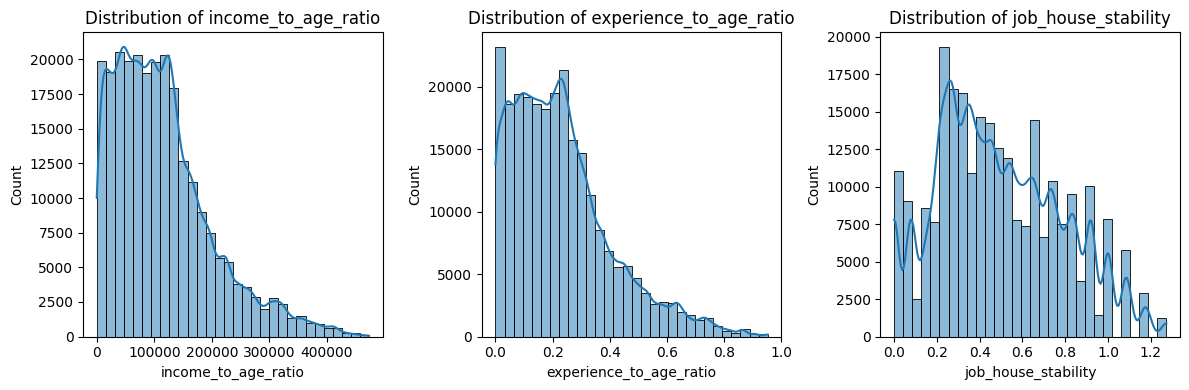

In [25]:
# Visualizing new features
plt.figure(figsize=(12, 4))

for i, feature in enumerate(new_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

### 1. Income_to_Age_Ratio (Rasio Pendapatan terhadap Usia)

Distribusi fitur ini condong ke kanan (right-skewed), yang berarti sebagian besar individu memiliki rasio pendapatan terhadap usia yang rendah, sementara beberapa individu memiliki rasio yang sangat tinggi.
Hal ini menunjukkan adanya outlier, seperti individu muda dengan pendapatan sangat tinggi.
Solusi yang bisa diterapkan: Transformasi log (np.log1p()) untuk mengurangi skewness.

### 2. Experience_to_Age_Ratio (Rasio Pengalaman terhadap Usia)

Nilai fitur ini berkisar antara 0 hingga 1, yang wajar karena pengalaman kerja seseorang seharusnya selalu lebih kecil atau sama dengan usia mereka.
Distribusinya juga condong ke kanan, menandakan mayoritas individu memiliki pengalaman kerja yang relatif rendah dibandingkan dengan usia mereka.
Insight tambahan: Banyak individu mungkin memulai karir mereka lebih lambat, mungkin karena pendidikan yang lebih lama sebelum masuk ke dunia kerja.

### 3. Job_House_Stability (Stabilitas Pekerjaan & Tempat Tinggal)

Distribusi fitur ini menunjukkan variasi yang lebih luas, yang berarti ada perbedaan yang signifikan dalam stabilitas pekerjaan dan tempat tinggal di antara individu.
Puncak pada nilai yang lebih rendah menunjukkan bahwa banyak individu sering berpindah pekerjaan atau tempat tinggal.
Insight tambahan:
Nilai tinggi pada fitur ini dapat menunjukkan seseorang yang lebih stabil dalam pekerjaan dan tempat tinggal.
Fitur ini dapat berhubungan dengan risiko kredit atau keandalan finansial seseorang.
Langkah Selanjutnya:
Deteksi outlier lebih lanjut pada fitur Income_to_Age_Ratio dan Job_House_Stability.
Normalisasi data menggunakan transformasi log jika perlu.
Lakukan analisis korelasi untuk melihat sejauh mana fitur-fitur baru ini berkontribusi terhadap model prediksi.